# Logistic Regresion Model for venomous fungus classification

Logistic Regression (LoR) belongs to the Supervised Learning classification. Then, the learning algorithm is the same as Linear Regression. There are three things that are different: 

    - Cost function
    - Prediction function
    - Performance measurement.

The LoR algorithm is as follows:

1. Load the dataset
2. Prepare data: add Bias or Ones' column and split dataset
3. Gradient Descent algorthim
4. Performance Measurement

## 1. Load Dataset

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#1. Load dataset

data = pd.read_csv('hongos.csv', header = None)
data.head()



,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,3,8,0,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
1,1,2,2,8,0,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
2,0,2,3,3,1,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
3,0,2,2,9,0,0,2,0,0,1,...,3,7,7,0,2,1,5,0,2,0
4,0,0,3,8,0,0,2,0,0,4,...,3,7,7,0,2,1,5,0,2,2


In [ ]:
dataset = np.array(data)
m,n = np.shape(dataset)

x = dataset[:, 1:21]
y = dataset[:, 0]
print(x)
print(y)
print('x:', np.shape(x))
print('y:', np.shape(y))

[[0 3 8 ... 1 5 1]
 [2 2 8 ... 1 5 0]
 [2 3 3 ... 1 1 1]
 ...
 [3 3 0 ... 1 5 2]
 [4 2 0 ... 1 1 7]
 [2 3 0 ... 1 5 5]]
[0 1 0 ... 0 1 0]
x: (8122, 20)
y: (8122,)


## 2. Prepare data

This step requires to add Bias, and then split dataset. We will define the Bias function to add the intercept column to the features matrix (input).

For spliting dataset we will use the train_test_split() function. Be sure to import the function before use it.

In [ ]:
#2. Prepare data: add Bias and split dataset
def Bias(X):
    ones = np.ones((len(X), 1))
    X1 = np.concatenate((ones, X), axis = 1)
    return X1

x = Bias(x)

print('x shape: ', np.shape(x))

#SPLIT DATASET
test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))

x shape:  (8122, 26)
Split X 8122 rows into train with 6497 and test with 1625
Split Y 8122 rows into train with 6497 and test with 1625
xTrain shape: (6497, 26) yTrain shape: (6497, 1)
xTest shape: (1625, 26) yTest shape: (1625, 1)


## 3. Gradient Descent algorithm

As we learnt from previous lesson, the Gradient Descent (GD) consists in two main steps:

1. Calculate the gradient
2. Update the W values

We will add the cost calculation to evaluate the algorithm performance and W convergence.

The LoR algorithm will be implemented using the number of iterarions as the while condition ends.

We will define four functios to implement the GD algorithm:

1. Logistic: h(  )
2. Cost: cost(  )
3. Gradient: grad(  ) 
4. Gradient Descent: GD(  )

### 3.1 Logistic function 

The logistic function is implemented using the formula:
$$h(w, x) = \frac{1}{1+e^{-w^Tx}}$$


In [ ]:
#3.1 Logistic function

def h(X, W):
    WX = np.dot(X, W.T)
    hx = 1 / (1 + np.exp(-WX))
    #print('hx: ',hx)
    return hx

### 3.2 Cost function

The cost function is defined by: 

$$
J(w) = -\frac{1}{m}\left(\sum_{i=1}^{m}y_i\ log[h(x_i, w)] + (1 - y_i)\ log[1 - h(x_i, w)] \right)
$$

In [ ]:
#3.2 Cost function

def cost(X, Y, W):
    m = len(X)
    #print(m)
    c = -(1/m) * np.sum(Y * np.log(h(X, W)) + (1 - Y) * np.log(1-h(X, W))) 
    #print(c)
    return c


### 3.3 Gradient function

The gradient function is defined by:

$$
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i, w) - y_i) x_i[j] 
$$

The gradient for the vector form is: 


$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{m} X^T(h(X, w) - y) 
$$


In [ ]:
#3.3 Gradient function

def grad(X, Y, W):
    m = len(X)
    #print(m)
    g = (1/m) * np.dot(X.T, (h(X,W) - Y))        
    return g


### 3.4 Gradient Descent function

The GD function will be define with the next steps.

1. Initialize variables: it, costo, and J
2. While the actual iteration (it) is less than iterations:
    - Calculate the gradient
    - Calculate the cost
    - Update W
    - Store the cost in J
3. The GD function will return the W vector and J

In [ ]:
# 3.4 Gradient Descent function

def gd(X, Y, W, alpha = 0.001, its = 1000):
    m = len(X)
    #print('M: ',m)
    it = 0
    costo = 0
    J = []
    while it < its:
        # Gradient
        gradiente = grad(X, Y, W)
            
        #Cost function
        costo = cost(X, Y, W)
            
        #Updating w
        W = W - alpha * gradiente.T
                
        #Storing cost
        J.append(costo)
   
        it += 1
              
    return W, J

## Testing the Gradient Descent 

Initial Cost (training data): 0.6931471805599453
Cost after training (training data): 0.1560386644739292
Cost after training (testing data): 0.16356444600329487
W: [[-0.10962766 -0.10962766 -0.10962766 -0.10962766 -0.10962766 -0.10962766
   0.04128958  0.98647158  0.05045968  2.0493764   0.14949685  1.0456844
  -4.77452529  4.43242081 -0.11749417 -1.47494171 -1.1827469  -0.90814123
  -0.05501683 -0.24420966  0.26240966  0.          0.70300131 -1.96918905
  -0.364345    0.650387  ]]


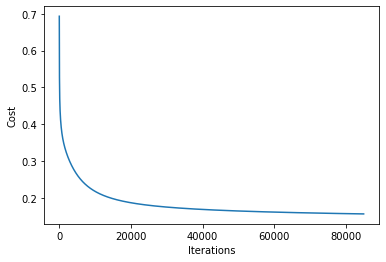

In [ ]:
alpha = 0.006
its = 85000

m, n = np.shape(x)

w = np.zeros((1, n))
#print(w)

print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost');

## 4. Performance Measurement

The accuracy for LoR is defined by:

$$ Acc = \frac{TP + TN}{m} $$


In [ ]:
#4. Accuracy

def accuracy(X, Y, W):
    
    #Tradicional
    #h1 = h(X, W) #Funcion sigmoidal
    #Ynew = []
    #for i in range(len(h1)):
    #    if h1[i] >= 0.5:
    #       Ynew.append(1)
    #    else:
    #        Ynew.append(0)
    
    #Lambda
    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, h(X, W)))
    
    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    suma = (Y == Ynew).sum()
    
    a = suma / len(Ynew)
    
    return a, suma

accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))

Training accuracy: 0.9428967215637987 6126 out of 6497
Testing accuracy: 0.9464615384615385 1538 out of 1625


In [ ]:
#data.info
